In [1]:
import pandas as pd 

df = pd.read_csv("data/processed/jobs_annotated.csv")

In [2]:
df = df.sort_values(["cv_id", "job_index"])
df

,row_id,cv_id,job_index,organization,position,startDate,endDate,status,department,seniority
0,0,0,0,Depot4Design GmbH,Prokurist,2019-08,NaN,ACTIVE,Other,Management
1,1,0,1,Depot4Design GmbH,CFO,2019-07,NaN,ACTIVE,Other,Management
2,2,0,2,Depot4Design GmbH,Betriebswirtin,2019-07,NaN,ACTIVE,Other,Professional
3,3,0,3,Depot4Design GmbH,Prokuristin,2019-07,NaN,ACTIVE,Other,Management
4,4,0,4,Depot4Design GmbH,CFO,2019-07,NaN,ACTIVE,Other,Management
...,...,...,...,...,...,...,...,...,...,...
2633,2633,607,1,Bistum,Justitiar,2014-03,NaN,ACTIVE,Other,Professional
2634,2634,607,2,FORESTA Management,Geschäftsführer,2010-01,NaN,ACTIVE,Other,Management
2635,2635,607,3,Malteser Hilfsdienst,Präsidium,1999,NaN,ACTIVE,Other,Management
2636,2636,607,4,Spies & Brunner RAe,Rechtsanwalt,1995-01,NaN,ACTIVE,Other,Professional


In [ ]:
seniority_order = {
    "Junior": 0,
    "Professional": 1,
    "Senior": 2,
    "Lead": 3,
    "Management": 4,
    "Director": 5
}

df["seniority_level"] = df["seniority"].map(seniority_order)

In [4]:
df

,row_id,cv_id,job_index,organization,position,startDate,endDate,status,department,seniority,seniority_level
0,0,0,0,Depot4Design GmbH,Prokurist,2019-08,NaN,ACTIVE,Other,Management,4
1,1,0,1,Depot4Design GmbH,CFO,2019-07,NaN,ACTIVE,Other,Management,4
2,2,0,2,Depot4Design GmbH,Betriebswirtin,2019-07,NaN,ACTIVE,Other,Professional,1
3,3,0,3,Depot4Design GmbH,Prokuristin,2019-07,NaN,ACTIVE,Other,Management,4
4,4,0,4,Depot4Design GmbH,CFO,2019-07,NaN,ACTIVE,Other,Management,4
...,...,...,...,...,...,...,...,...,...,...,...
2633,2633,607,1,Bistum,Justitiar,2014-03,NaN,ACTIVE,Other,Professional,1
2634,2634,607,2,FORESTA Management,Geschäftsführer,2010-01,NaN,ACTIVE,Other,Management,4
2635,2635,607,3,Malteser Hilfsdienst,Präsidium,1999,NaN,ACTIVE,Other,Management,4
2636,2636,607,4,Spies & Brunner RAe,Rechtsanwalt,1995-01,NaN,ACTIVE,Other,Professional,1


In [12]:
# make sure ordering is correct within each cv
d = df.sort_values(["cv_id", "job_index"]).copy()

# previous seniority per cv
d["prev_seniority_level"] = d.groupby("cv_id")["seniority_level"].shift(-1)

# a "position change" is any row that has a previous row in the same cv
d["is_change"] = d["prev_seniority_level"].notna()

# increase on that change
d["seniority_increase"] = d["seniority_level"] > d["prev_seniority_level"]

# overall counts
total_changes = int(d["is_change"].sum())
increase_changes = int((d["is_change"] & d["seniority_increase"]).sum())
share = increase_changes / total_changes if total_changes else float("nan")

total_changes, increase_changes, share


(2029, 631, 0.310990635781173)

In [13]:
d

,row_id,cv_id,job_index,organization,position,startDate,endDate,status,department,seniority,seniority_level,prev_seniority_level,is_change,seniority_increase
0,0,0,0,Depot4Design GmbH,Prokurist,2019-08,NaN,ACTIVE,Other,Management,4,4.0,True,False
1,1,0,1,Depot4Design GmbH,CFO,2019-07,NaN,ACTIVE,Other,Management,4,1.0,True,True
2,2,0,2,Depot4Design GmbH,Betriebswirtin,2019-07,NaN,ACTIVE,Other,Professional,1,4.0,True,False
3,3,0,3,Depot4Design GmbH,Prokuristin,2019-07,NaN,ACTIVE,Other,Management,4,4.0,True,False
4,4,0,4,Depot4Design GmbH,CFO,2019-07,NaN,ACTIVE,Other,Management,4,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,2633,607,1,Bistum,Justitiar,2014-03,NaN,ACTIVE,Other,Professional,1,4.0,True,False
2634,2634,607,2,FORESTA Management,Geschäftsführer,2010-01,NaN,ACTIVE,Other,Management,4,4.0,True,False
2635,2635,607,3,Malteser Hilfsdienst,Präsidium,1999,NaN,ACTIVE,Other,Management,4,1.0,True,True
2636,2636,607,4,Spies & Brunner RAe,Rechtsanwalt,1995-01,NaN,ACTIVE,Other,Professional,1,NaN,False,False


<Axes: xlabel='delta'>

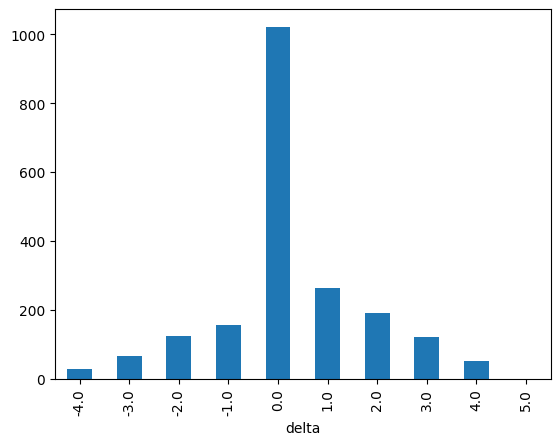

In [14]:
d["delta"] = d["seniority_level"] - d["prev_seniority_level"]
delta_counts = d["delta"].value_counts().sort_index()
delta_counts.plot.bar()
